# 🧠 Tumor Growth Modeling with ODEs

In this notebook, we simulate tumor growth using two classical mathematical models from mathematical biology:

- **Logistic Growth**
- **Gompertz Growth**

These models describe how tumor size evolves over time, accounting for biological limits such as resource constraints or immune system response. We will derive, solve, and visualize these models using Python's scientific stack.

---

## Background

In **MATH 250B** (Intro to Linear Algebra and Differential Equations), we studied the **logistic growth equation**, a nonlinear differential equation of the form:

$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$

The **Gompertz Growth** equation is derived as:

$
\frac{dP}{dt} = rP\left(\ln(\frac{K}{P}\right))
$

Where:
- $P(t)$: Population size (or tumor size) at time $t$
- $r$: Growth rate
- $K$: Carrying capacity (maximum sustainable population size)

This same framework is widely used in **tumor growth modeling**, where \( P(t) \) represents the tumor mass or volume. We will compare it to another important model — the **Gompertz equation**, which often more accurately captures real tumor behavior at large sizes.

---


       time   logistic   gompertz
0  0.000000  10.000000  10.000000
1  0.200401  10.404687  11.983164
2  0.400802  10.825574  14.257702
3  0.601202  11.263292  16.849024
4  0.801603  11.718498  19.781519


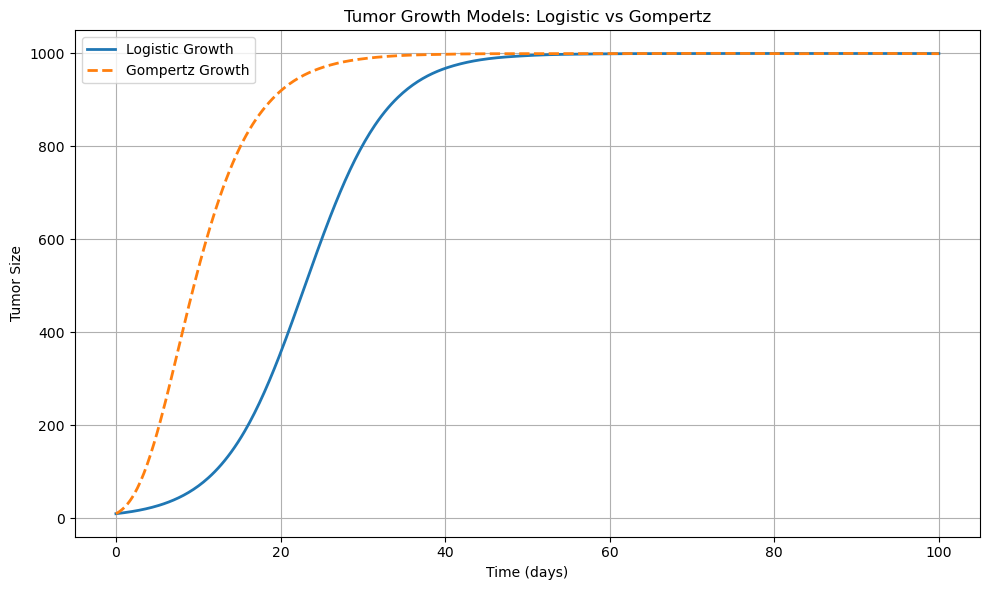

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt

def logistic_model(t, P, r, K):
    return r*P * (1 - P/K)

def gompertz_model(t, P, r, K):
    return r*P*np.log(K/P)

# Solve IVPs numerically
r = 0.2 # Growth rate
K = 1000 # Carrying capacity
P0 = 10 # Initial tumor size

t_span = (0,100)
t_eval = np.linspace(t_span[0], t_span[1], 500)
sol_logistic = solve_ivp(logistic_model, t_span, [P0], args=(r,K), t_eval=t_eval)
sol_gompertz = solve_ivp(gompertz_model, t_span, [P0], args=(r,K), t_eval=t_eval)

# Print out first set of data points
df = pd.DataFrame({
    'time': t_eval,
    'logistic': sol_logistic.y[0],
    'gompertz': sol_gompertz.y[0],
})

print(df.head())

# Saving data
df.to_csv('simulated_growth_model.csv', columns=['time', 'logistic', 'gompertz'], index=False)


plt.figure(figsize=(10,6))
plt.plot(sol_logistic.t, sol_logistic.y[0], label='Logistic Growth', linewidth=2)
plt.plot(sol_gompertz.t, sol_gompertz.y[0], label='Gompertz Growth', linewidth=2, linestyle='--')
plt.title("Tumor Growth Models: Logistic vs Gompertz")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary

In this notebook, we modeled tumor growth dynamics using two classical ordinary differential equations (ODEs) from mathematical biology:

- **Logistic Growth Model:**  
  Captures tumor expansion under limited resource conditions, exhibiting a symmetrical sigmoid curve. Growth initially accelerates, then slows as the tumor approaches the carrying capacity \( K \), modeling nutrient limitations or spatial constraints.

- **Gompertz Growth Model:**  
  Describes decelerating tumor growth using a logarithmic term, resulting in an asymmetric sigmoid shape. This model is often more accurate for fitting empirical tumor growth data, especially in later stages when cell proliferation slows significantly.

We implemented these models numerically using `scipy.integrate.solve_ivp`, explored how varying model parameters (e.g., growth rate \( r \), carrying capacity \( K \)) affects tumor progression, and validated the logistic model against its known analytical solution.

Additionally, we visualized:
- Time series plots comparing logistic and Gompertz growth behaviors
- Phase portraits showing how the rate of change \( \frac{dP}{dt} \) depends on tumor size
- A tabulated dataset of synthetic tumor growth for further use

This notebook serves as both a theoretical and computational foundation for understanding tumor dynamics through the lens of dynamical systems.

---

## Next Notebook: Machine Learning-Based Tumor Growth Prediction

In the next phase of this project, we will use the synthetic data generated from these ODE models to train supervised machine learning models. These models will attempt to **learn tumor growth patterns** without explicit knowledge of the underlying equations.

We plan to:
- Apply regression techniques (e.g., linear regression, decision trees, random forests)
- Evaluate predictive accuracy using metrics such as RMSE and R²
- Compare ML-based predictions to the original ODE model outputs

This transition from mechanistic modeling to data-driven modeling will showcase the power of combining mathematical biology with machine learning — an increasingly important paradigm in computational oncology and bioinformatics.

---
